# Cross-validation
Model selection is one of the important subjects in statistical modeling. We have the possibility of including as many as features, but all of them would not improve the model accuracy. It is important to know which features are improving the model. There are two different approaches: 

- Information theoretic approach such as AIC, BIC, Mallow's Cp.
- Predition accuracy approach: Leave-one-out, k-fold crossvalidation.











# Load file
Commonly two libraries are used to load a csv files.
- numpy function `np.loadtext` and `np.genfromtext ` 
- pandas function `pd.read_csv`

Here we prefer using pandas

In [1]:
import pandas as pd
path='C:/Users/Damoon/Dropbox (work)/McGill Teaching/data/'
filename = path+'Auto.csv'
auto = pd.read_csv(filename, na_values=['?'], na_filter=True)
auto = auto.dropna()

In [2]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


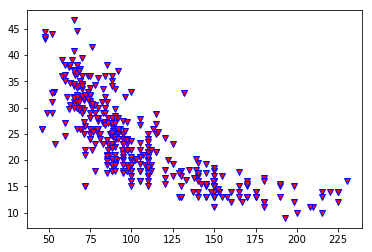

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(auto['horsepower'], auto['mpg'], 'bv', mfc='red');

# seaborn 
The seaborn package bring better styling and more plot function. The seaborn package enriches matplotlib. Let's try the regplot fucntion of seaborn for instance.


C:\Users\Damoon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


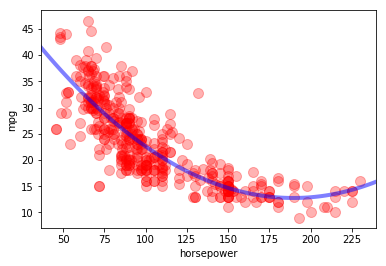

In [16]:
import seaborn as sns           #sets up styles and gives us more plotting options
sns.regplot(x="horsepower", y="mpg", data=auto, ci = False,
    scatter_kws={"color":"r", "alpha":0.3, "s":100},
    line_kws={"color":"b", "alpha":0.5, "lw":4}, marker="o", order=2)

# Quadratic model
It appears that a quadratic model makes sense. Let's check if this guess has support from data.

In [17]:
import numpy as np
import statsmodels.formula.api as smf
model = smf.ols(formula='mpg ~ horsepower', data = auto)

lr1 = model.fit()
lr1.summary2()
lr1.aic 

2361.3236578374017

In [18]:
model = smf.ols(formula='mpg ~ horsepower +\
                np.power(horsepower,2)', data = auto)
lr2 = model.fit()
lr2.aic

2272.353522359692

In [19]:
model = smf.ols(formula='mpg ~ horsepower +\
np.power(horsepower,2)+ np.power(horsepower,3)', data = auto)
lr3 = model.fit()
lr3.aic

2273.5312967115547

In [20]:
model = smf.ols(formula='mpg ~ horsepower +\
np.power(horsepower,2)+ np.power(horsepower,3)+\
np.power(horsepower,4)', data = auto)
lr4 = model.fit()
lr4.aic

2274.108109859446

# Leave-one-out
One of the most common validation method is leave-one-out, or n-fold crossvalidation

In [21]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression


loo = LeaveOneOut()
loo.get_n_splits(auto)

392

# numpy array
Make sure you feed sklearn algorithms a numpy array. In many cases sklearn accepts pandas dataframes too, but it is highly recommended to feed numpy arrays into sklearn functions.

In [22]:
X = auto[['horsepower']].values
y = auto['mpg'].values

rss = np.zeros(auto.shape[0])
i = 0
for train_i, test_i in loo.split(auto):
    lr = LinearRegression() 
    lr = lr.fit(X[train_i], y[train_i])
    rss[i]=(lr.predict(X[test_i]) - y[test_i])**2
    i= i + 1
# mse is the squared error for each sample in the test set.
np.sum(rss)

9498.753299028256

In [23]:
X = auto[['horsepower', 'displacement']].values
rss = np.zeros(auto.shape[0])
i = 0
for train_i, test_i in loo.split(auto):
    lr = LinearRegression() 
    lr = lr.fit(X[train_i], y[train_i])
    rss[i]=(lr.predict(X[test_i]) - y[test_i])**2
# you may write i = i+1 as follows
    i += 1
np.sum(rss)

8147.185205052872

In [24]:
from sklearn.model_selection import KFold
X = auto[['horsepower', 'displacement']].values
k = 5
rss = np.zeros(k)
kf = KFold(n_splits=k, shuffle=True)
i = 0
for train_i, test_i in kf.split(auto):
    lr = LinearRegression() 
    lr = lr.fit(X[train_i], y[train_i])
    rss[i]=np.sum((lr.predict(X[test_i]) - y[test_i])**2)
    i+=1
rss


array([1308.99737784, 2211.04137851, 1391.69991763, 1535.42311972,
       1835.79340066])

In [25]:
np.sum(rss)

8282.955194367874